<a href="https://colab.research.google.com/github/daC0rtes/P.E-regresion/blob/main/pre_autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Es un trabajo llevado a cabo con la guia de Siddhardhan (yt) no me apropio del codigo, debe ser visto como produccion academica recopilatoria, donde los derechos de autor se le atribuyen a la persona ya mencionada.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

subir los datos y el procesamiento de los mismos

In [3]:
car_data= pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#verificamos el numero de valores faltantes
car_data.isnull().sum() #no falta nada, eso es muy bueno

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#verificamos la distribucion de datos categoricos, ejemplo la trasmicion
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
# cambiaremos los datos anteriormente descritos por valores numericos, ejemplo
#  petrol=0,diesel=1,cng=2
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_data.head() #data transformada

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Dividimos los datos en prueba y "entreno"

In [9]:
#nuestro target es el precio por el cual se va a vender
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y =car_data['Selling_Price']

In [10]:
 X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=2)
 #usamos 0.1 porque los datos son pocos

Entrenamiento del modelo

1. Regresion lineal

In [21]:
lineal= LinearRegression()

In [12]:
lineal.fit(X_train,Y_train)

LinearRegression()

Evaluamos el modelo

In [13]:
#la prediccion dada por el modelo
train_prediccion = lineal.predict(X_train)

In [14]:
#comparamos la prediccion con los datos dados
#usando error R cuadrado
error = metrics.r2_score(Y_train,train_prediccion)
print("El error cuadrado es: ", error)

El error cuadrado es:  0.8799451660493711


visualizamos los datos

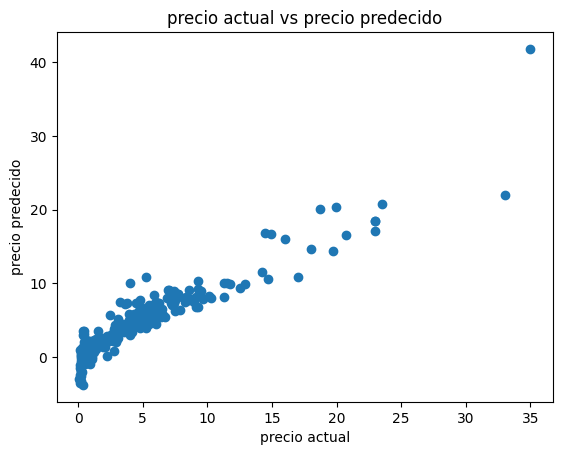

In [16]:
plt.scatter(Y_train, train_prediccion)
plt.xlabel("precio actual")
plt.ylabel("precio predecido")
plt.title("precio actual vs precio predecido")
plt.show()

In [19]:
#la prediccion dada por el modelo esta vez con los datos de test
test_prediccion = lineal.predict(X_test)
#error r cuadrado
error_test= metrics.r2_score(Y_test,test_prediccion)
print(" error r cuadrado:", error_test)

 error r cuadrado: 0.8365766715027051


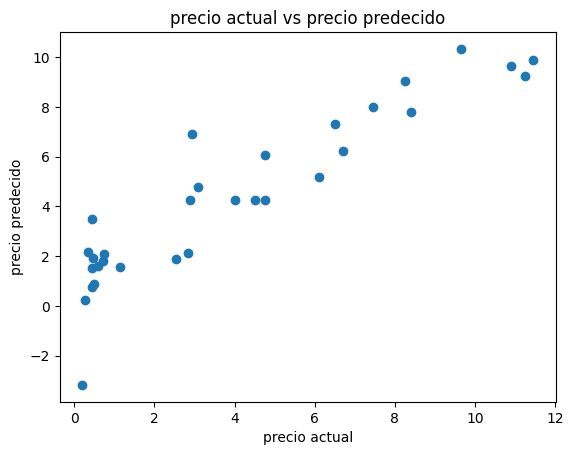

In [20]:
plt.scatter(Y_test, test_prediccion)
plt.xlabel("precio actual")
plt.ylabel("precio predecido")
plt.title("precio actual vs precio predecido")
plt.show()

Regresion  "Lasso"

In [22]:
laso_r= Lasso()

In [23]:
laso_r.fit(X_train,Y_train)

Lasso()

Evaluamos el modelo

In [24]:
#la prediccion dada por el modelo
train_prediccion = laso_r.predict(X_train)

In [25]:
#comparamos la prediccion con los datos dados
#usando error R cuadrado
error = metrics.r2_score(Y_train,train_prediccion)
print("El error cuadrado es: ", error)

El error cuadrado es:  0.8427856123435794


visualizamos los datos

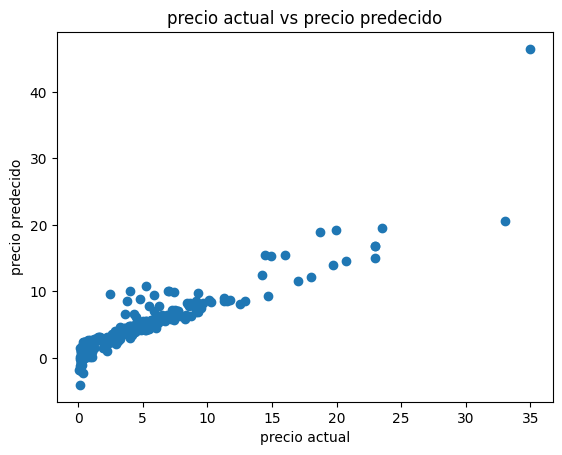

In [26]:
plt.scatter(Y_train, train_prediccion)
plt.xlabel("precio actual")
plt.ylabel("precio predecido")
plt.title("precio actual vs precio predecido")
plt.show()

In [28]:
#la prediccion dada por el modelo esta vez con los datos de test
test_prediccion = laso_r.predict(X_test)
#error r cuadrado
error_test= metrics.r2_score(Y_test,test_prediccion)
print(" error r cuadrado:", error_test)

 error r cuadrado: 0.8709167941173195


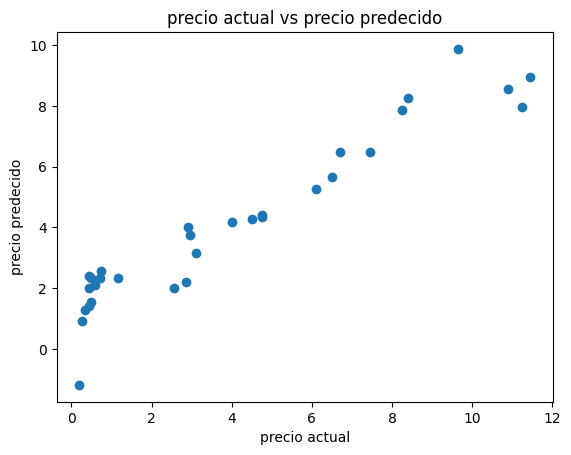

In [29]:
plt.scatter(Y_test, test_prediccion)
plt.xlabel("precio actual")
plt.ylabel("precio predecido")
plt.title("precio actual vs precio predecido")
plt.show()